In [1]:
# collisionData plot
import numpy as np

In [8]:
Data = np.load(r'C:\Users\xumw1\Documents\GitHub\robotPathPlanning\logs\CollisionData.npy')
Data = np.load('logs/CollisionData.npy')
Data.shape

(117649, 17)

Data = np.hstack((config, y.reshape(-1,1),EEPosition,EEOrientation,EEQuaternion))

In [25]:
config, y, EEPosition, EEOrientation, EEQuaternion = Data[:,:6], Data[:,6], Data[:,7:10], Data[:,10:13], Data[:,13:17]

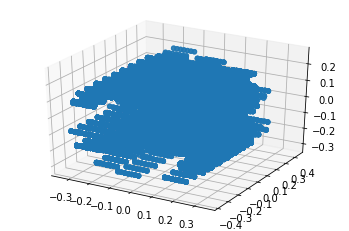

In [19]:
# plot all points
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-EEPosition[:,1], EEPosition[:,2], -EEPosition[:,0])
plt.show()

[[-0.13358343  0.13937679 -0.12829268]
 [-0.13358343  0.13937679 -0.12829268]
 [-0.10452056  0.29297423 -0.36421895]
 ...
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]


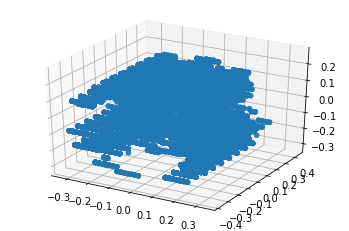

In [26]:
# plot points in C-free
EEPosition_free = EEPosition[y==0,:]
print(EEPosition_free)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-EEPosition_free[:,1], EEPosition_free[:,2], -EEPosition_free[:,0])
plt.show()